In [10]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math

In [11]:
with open(r'../../results/outcomes/ST6_results.csv') as ST6:
    df_ST6=pd.read_csv(ST6)
df_ST6=df_ST6.groupby(['year'])['total cost_electric','capex_broadband', 'opex_broadband'].sum()
df_ST6

C:\Users\Mahsa\AppData\Local\Temp/ipykernel_4780/2112260271.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ST6=df_ST6.groupby(['year'])['total cost_electric','capex_broadband', 'opex_broadband'].sum()


,total cost_electric,capex_broadband,opex_broadband
year,,,
0,5.255197e+04,0.000000e+00,1.093599e+06
1,1.912442e+06,1.553633e+07,1.148279e+06
2,3.138791e+05,1.807415e+06,1.205693e+06
3,4.657138e+05,3.178046e+06,1.265977e+06
4,7.799582e+05,5.879916e+06,1.329276e+06
5,1.095705e+06,7.883925e+06,1.395740e+06
6,9.801470e+05,7.063375e+06,1.465527e+06
7,8.514050e+05,5.562233e+06,1.538803e+06
8,1.187418e+06,9.236170e+06,1.615743e+06


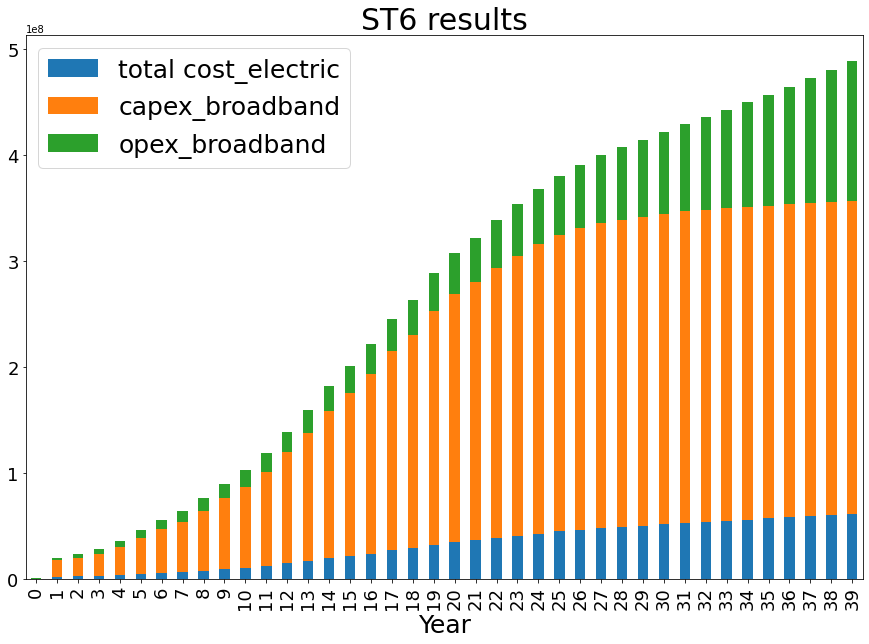

In [12]:
# plotting ST6 results for broadband
new_df_analyze_result_ST6=np.cumsum(df_ST6)
new_df_analyze_result_ST6.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("ST6 results", fontsize=30)
plt.xlabel('Year',fontsize=25)
plt.legend(['total cost_electric','capex_broadband', 'opex_broadband'], fontsize=25)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/ST6-broadband.png')

In [13]:
with open(r'../../results/outcomes/ST5_results.csv') as ST5:
    df_ST5=pd.read_csv(ST5)
df_ST5=df_ST5.groupby(['year'])['total cost_electric','capex_broadband', 'opex_broadband'].sum()
#df_ST5

C:\Users\Mahsa\AppData\Local\Temp/ipykernel_4780/246720537.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ST5=df_ST5.groupby(['year'])['total cost_electric','capex_broadband', 'opex_broadband'].sum()


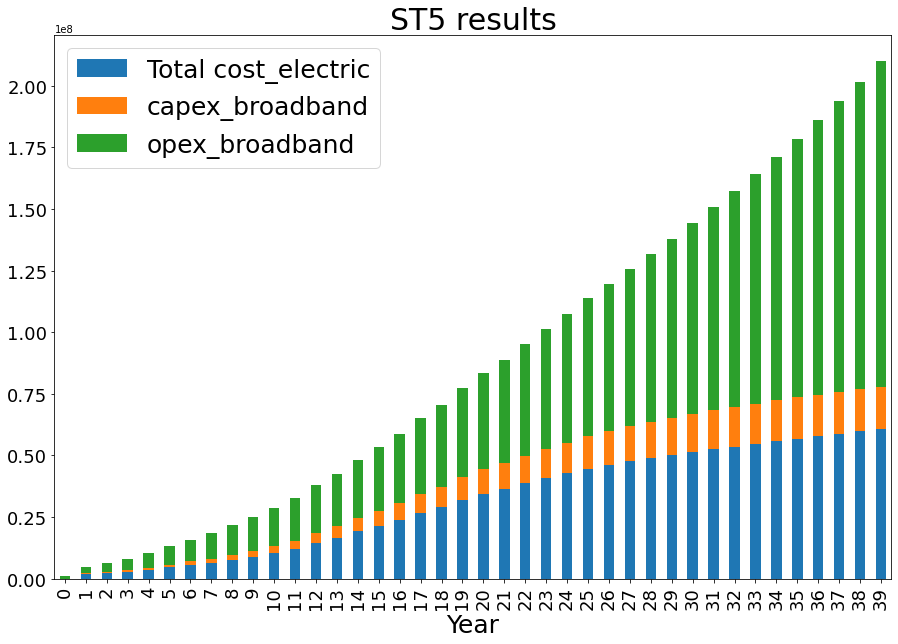

In [14]:
# plotting ST5 results for broadband
new_df_analyze_result_ST5=np.cumsum(df_ST5)
new_df_analyze_result_ST5.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("ST5 results", fontsize=30)
plt.xlabel('Year',fontsize=25)
plt.legend(['Total cost_electric','capex_broadband', 'opex_broadband'], fontsize=25)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/ST5-broadband.png')

In [46]:
with open(r'../../results/outcomes/ST4_results.csv') as ST4:
    df_ST4=pd.read_csv(ST4)
df_ST4=df_ST4.groupby(['year'])['total_cost_electric','capex_broadband', 'opex_broadband'].sum()
df_ST4

C:\Users\Mahsa\AppData\Local\Temp/ipykernel_19864/356064333.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ST4=df_ST4.groupby(['year'])['total_cost_electric','capex_broadband', 'opex_broadband'].sum()


,total_cost_electric,capex_broadband,opex_broadband
year,,,
0,52551.965597,0.000000e+00,1.093599e+06
1,285423.857821,2.286793e+06,1.148279e+06
2,108349.258479,2.621517e+05,1.205693e+06
3,120176.804878,4.454702e+05,1.265977e+06
4,165809.978940,8.292014e+05,1.329276e+06
5,193798.639308,1.188677e+06,1.395740e+06
6,217544.513562,1.036242e+06,1.465527e+06
7,208833.157684,8.458045e+05,1.538803e+06
8,300185.400055,1.280527e+06,1.615743e+06


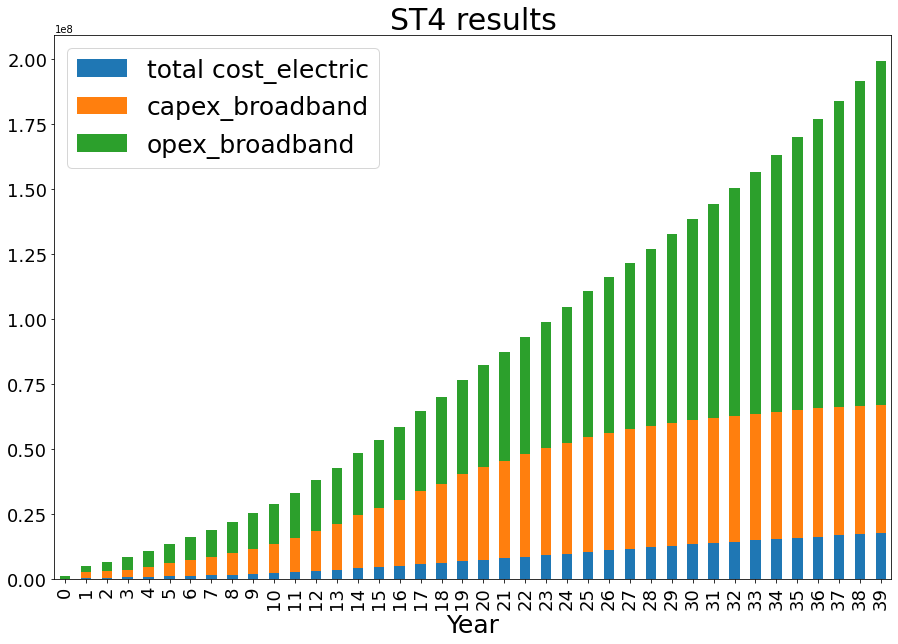

In [47]:
# plotting ST4 results for broadband
new_df_analyze_result_ST4=np.cumsum(df_ST4)
new_df_analyze_result_ST4.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("ST4 results", fontsize=30)
plt.xlabel('Year',fontsize=25)
plt.legend(['total cost_electric','capex_broadband', 'opex_broadband'], fontsize=25)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/ST4-broadband.png')

In [48]:
with open(r'../../results/outcomes/ST3_results.csv') as ST3:
    df_ST3=pd.read_csv(ST3)
df_ST3=df_ST3.groupby(['year'])['total_cost_electric','capex_broadband', 'opex_broadband'].sum()
df_ST3

C:\Users\Mahsa\AppData\Local\Temp/ipykernel_19864/2413397900.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ST3=df_ST3.groupby(['year'])['total_cost_electric','capex_broadband', 'opex_broadband'].sum()


,total_cost_electric,capex_broadband,opex_broadband
year,,,
0,52551.965597,0.000000,1.093599e+06
1,285423.857821,514895.484809,1.148279e+06
2,108349.258479,69750.384826,1.205693e+06
3,120176.804878,104150.212738,1.265977e+06
4,165809.978940,200186.018376,1.329276e+06
5,193798.639308,262601.970266,1.395740e+06
6,217544.513562,272006.676318,1.465527e+06
7,208833.157684,231385.749161,1.538803e+06
8,300185.400055,397166.208502,1.615743e+06


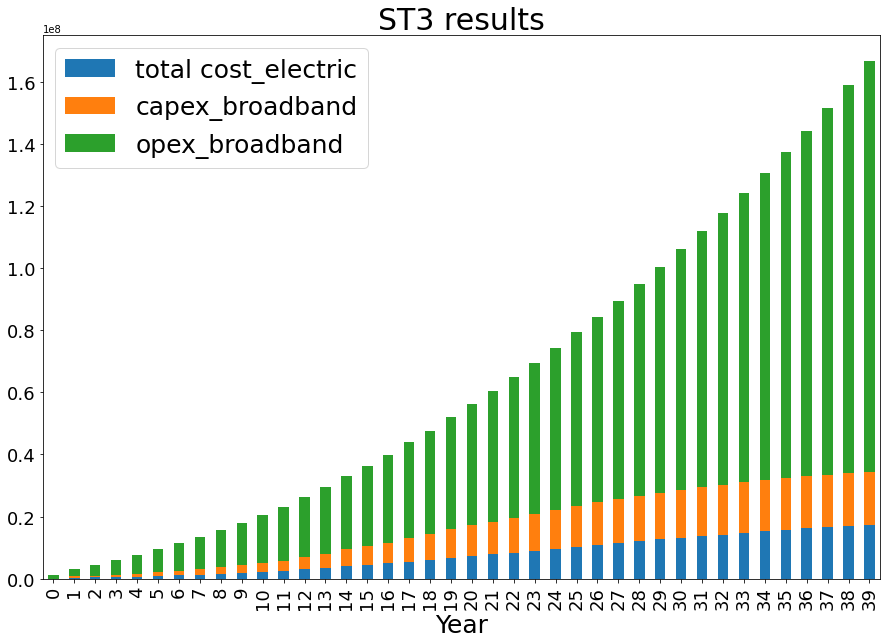

In [49]:
# plotting ST3 results for broadband
new_df_analyze_result_ST3=np.cumsum(df_ST3)
new_df_analyze_result_ST3.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("ST3 results", fontsize=30)
plt.xlabel('Year',fontsize=25)
plt.legend(['total cost_electric','capex_broadband', 'opex_broadband'], fontsize=25)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/ST3-broadband.png')

In [52]:
with open(r'../../results/outcomes/ST2_results.csv') as ST2:
    df_ST2=pd.read_csv(ST2)
df_ST2=df_ST2.groupby(['year'])['total cost_electric','capex_broadband', 'opex_broadband'].sum()
df_ST2

C:\Users\Mahsa\AppData\Local\Temp/ipykernel_19864/735843292.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ST2=df_ST2.groupby(['year'])['total cost_electric','capex_broadband', 'opex_broadband'].sum()


,total cost_electric,capex_broadband,opex_broadband
year,,,
0,5.255197e+04,0.000000,1.093599e+06
1,1.912442e+06,514895.484809,1.148279e+06
2,3.138791e+05,69750.384826,1.205693e+06
3,4.657138e+05,104150.212738,1.265977e+06
4,7.799582e+05,200186.018376,1.329276e+06
5,1.095705e+06,262601.970266,1.395740e+06
6,9.801470e+05,272006.676318,1.465527e+06
7,8.514050e+05,231385.749161,1.538803e+06
8,1.187418e+06,397166.208502,1.615743e+06


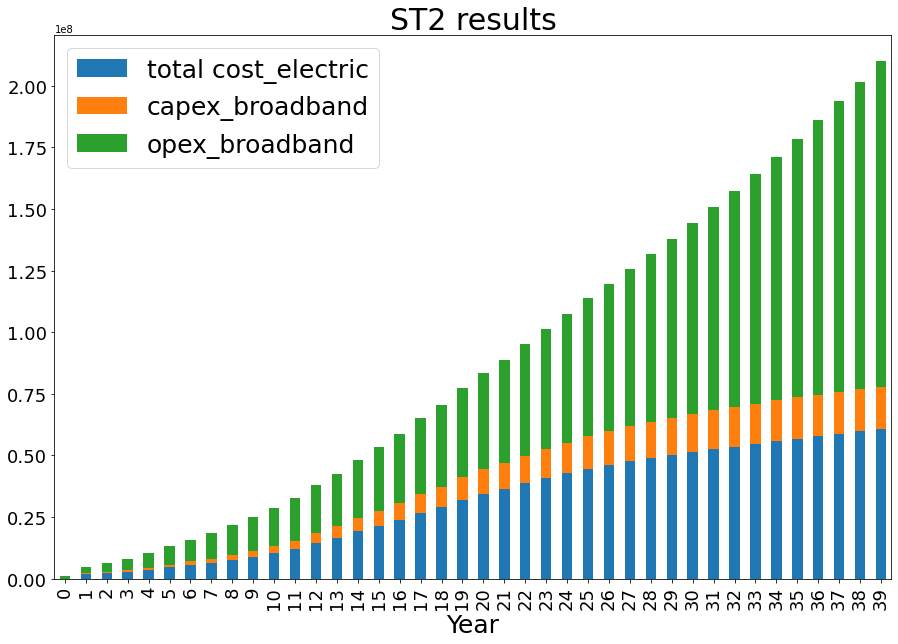

In [53]:
# plotting ST2 results for broadband
new_df_analyze_result_ST2=np.cumsum(df_ST2)
new_df_analyze_result_ST2.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("ST2 results", fontsize=30)
plt.xlabel('Year',fontsize=25)
plt.legend(['total cost_electric','capex_broadband', 'opex_broadband'], fontsize=25)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/ST2-broadband.png')

In [56]:
with open(r'../../results/outcomes/ST1_results.csv') as ST1:
    df_ST1=pd.read_csv(ST1)
df_ST1=df_ST1.groupby(['year'])['total_cost_electric','capex_broadband', 'opex_broadband'].sum()
df_ST1

C:\Users\Mahsa\AppData\Local\Temp/ipykernel_19864/3622614433.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ST1=df_ST1.groupby(['year'])['total_cost_electric','capex_broadband', 'opex_broadband'].sum()


,total_cost_electric,capex_broadband,opex_broadband
year,,,
0,52551.965597,0.000000,1.093599e+06
1,285423.857821,514895.484809,1.148279e+06
2,108349.258479,69750.384826,1.205693e+06
3,120176.804878,104150.212738,1.265977e+06
4,165809.978940,200186.018376,1.329276e+06
5,193798.639308,262601.970266,1.395740e+06
6,217544.513562,272006.676318,1.465527e+06
7,208833.157684,231385.749161,1.538803e+06
8,300185.400055,397166.208502,1.615743e+06


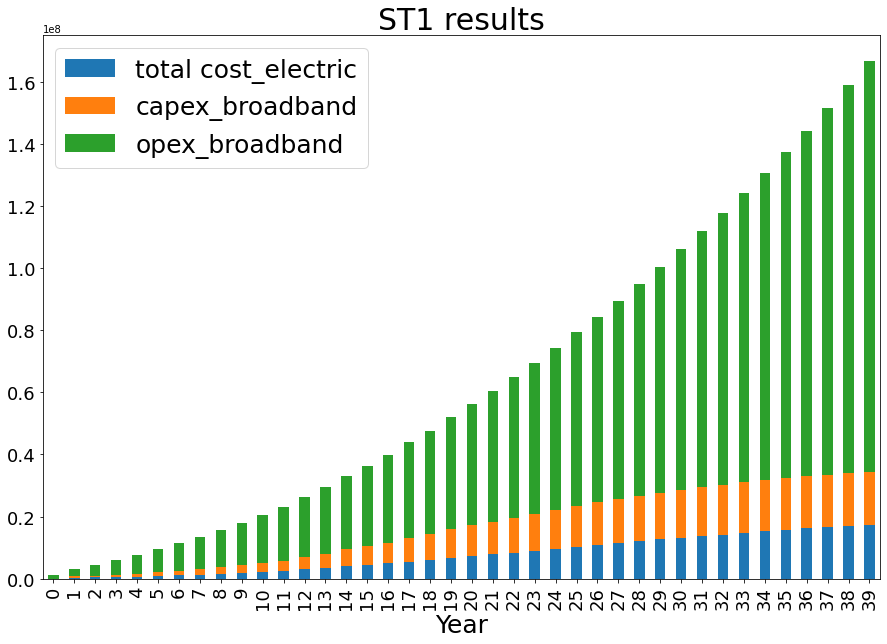

In [57]:
# plotting ST1 results for broadband
new_df_analyze_result_ST1=np.cumsum(df_ST1)
new_df_analyze_result_ST1.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("ST1 results", fontsize=30)
plt.xlabel('Year',fontsize=25)
plt.legend(['total cost_electric','capex_broadband', 'opex_broadband'], fontsize=25)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/ST1-broadband.png')

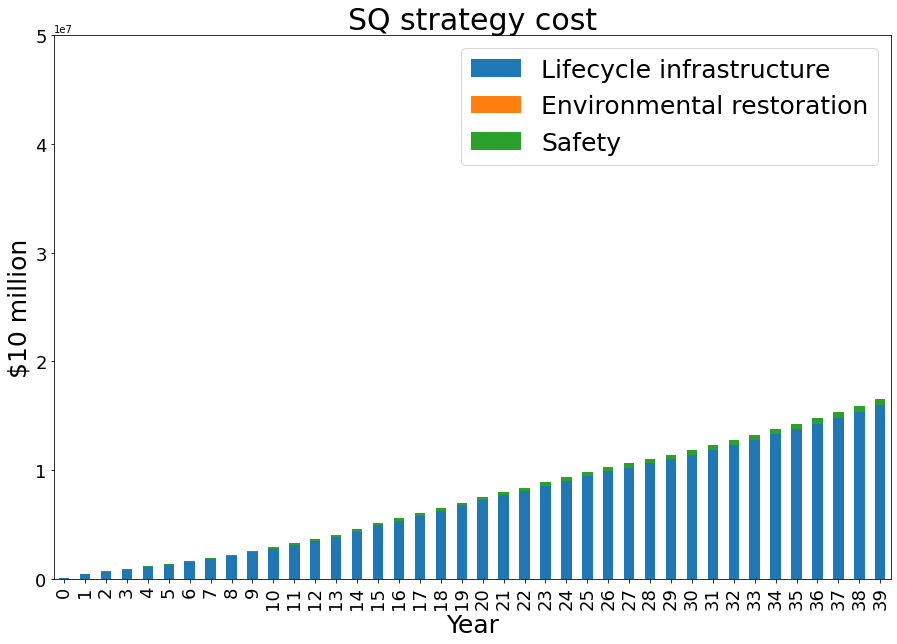

In [6]:
# plotting statusquo strategy cost
with open(r'../../results/outcomes/cost-analyze-result-statusQuo-strategy.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['lifecycle infrastructure', 'environmental restoration', 'safety']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.ylim([0, 50000000])
plt.grid()
#scale_factor=0.01
#ymin, ymax = plt.ylim()
#plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.title("SQ strategy cost", fontsize=30)
plt.ylabel('$10 million',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.legend(['Lifecycle infrastructure', 'Environmental restoration', 'Safety'], fontsize=25)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/statusQuo-strategy-cost.png')

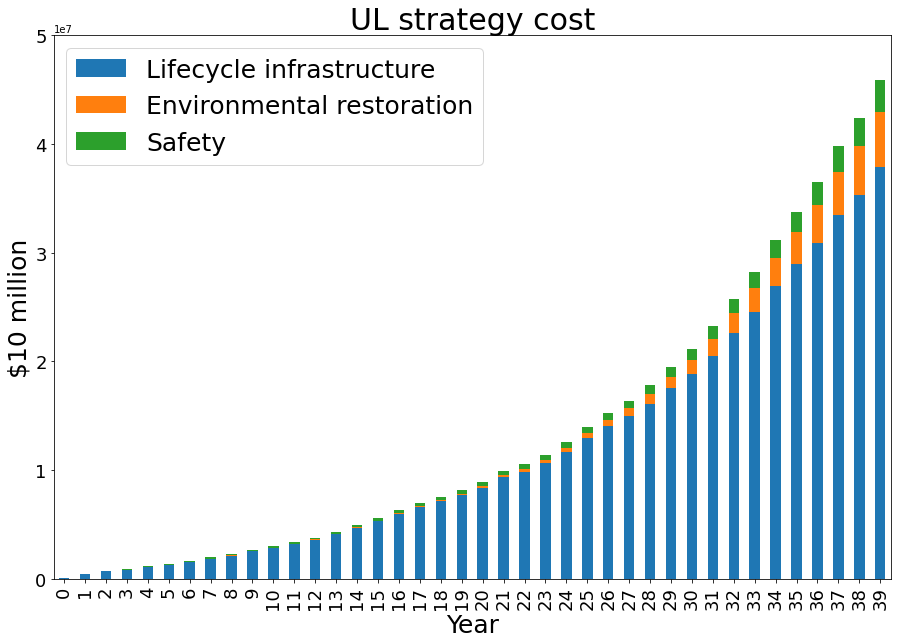

In [7]:
# plotting undergrounding after lifespan strategy cost
with open(r'../../results/outcomes/cost-analyze-result-undergrounding-strategy.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['lifecycle infrastructure', 'environmental restoration', 'safety']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.grid()
plt.ylim([0, 50000000])
plt.title("UL strategy cost", fontsize=30)
plt.ylabel('$10 million',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.legend(['Lifecycle infrastructure', 'Environmental restoration', 'Safety'], fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/undergrounding-after-lifespan-strategy-cost.png')

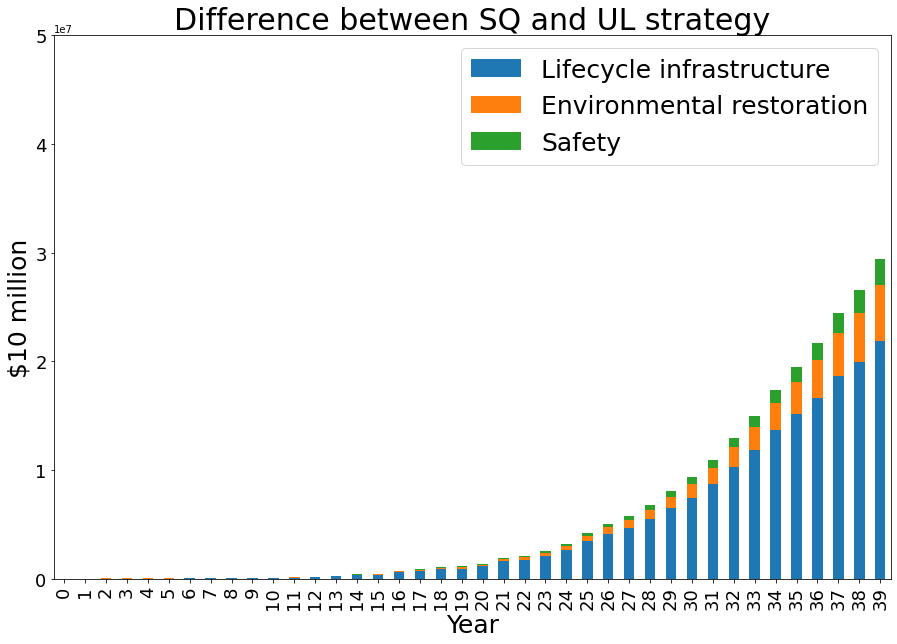

In [8]:
# plotting additional cost due to undergrounding
with open(r'../../results/outcomes/cost-analyze-result-additional-cost.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['lifecycle infrastructure', 'environmental restoration', 'safety']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True)
plt.grid()
plt.ylim([0, 50000000])
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Difference between SQ and UL strategy", fontsize=30)
plt.ylabel('$10 million', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.legend(['Lifecycle infrastructure', 'Environmental restoration', 'Safety'], fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.figure(figsize=(3, 3))
plt.savefig(r'../../figures/additional-cost-undergrounding.png')

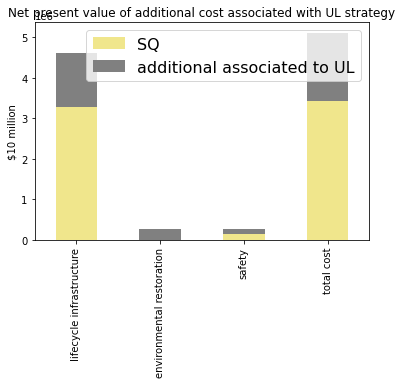

In [9]:
# plotting net present value of cost
with open(r'../../results/outcomes/cost-net-present-value-statusQuo.csv') as ns:
    net_cost_statusQuo= pd.read_csv(ns)
with open(r'../../results/outcomes/cost-net-present-value-additional.csv') as na:
    net_cost_additional= pd.read_csv(na) 
frames = [net_cost_statusQuo, net_cost_additional]
result = pd.concat(frames)
result['strategy']=['SQ','additional associated to UL']
result.set_index('strategy').T.plot.bar(stacked=True, color=['khaki','gray'])
plt.title("Net present value of additional cost associated with UL strategy")
plt.ylabel('$10 million')
plt.legend(fontsize=16)
#plt.figure(figsize=(3, 3))
plt.savefig(r'../../figures/net-present-cost.png', dpi=100)

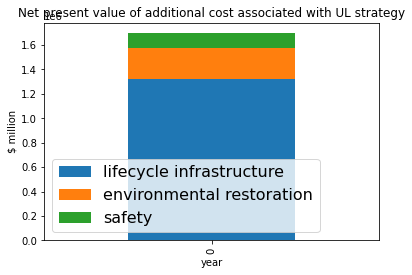

In [10]:
# plotting net present value of costs
with open(r'../../results/outcomes/cost-net-present-value-additional.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['lifecycle infrastructure', 'environmental restoration', 'safety']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True)
plt.title("Net present value of additional cost associated with UL strategy")
plt.ylabel('$ million')
plt.xlabel('year')
plt.legend(fontsize=16)
plt.savefig(r'../../figures/net-present-additional-cost.png.png')

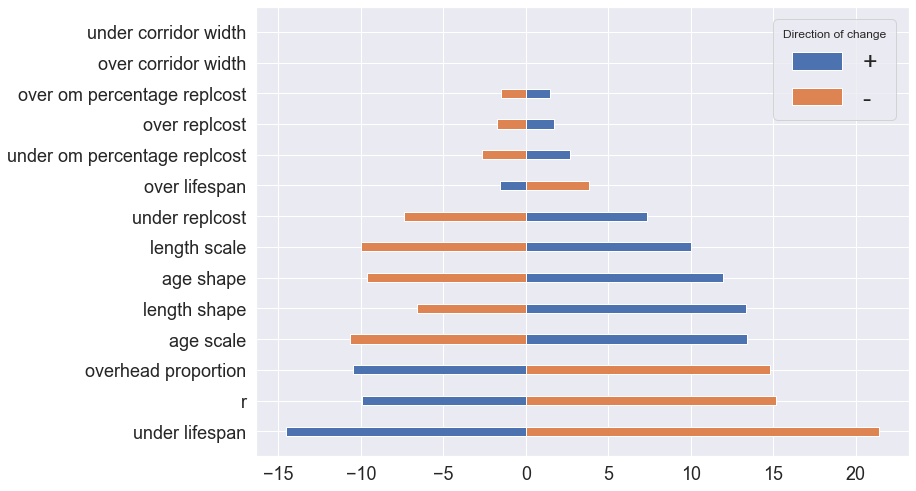

In [11]:
# plotting sensitivity analysis results for statusquo strategy
with open(r'../../results/outcomes/cost-sensitivity-result-statusquo.csv') as ss:
    sensitivity_statusQuo=pd.read_csv(ss)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# creating a dataframe
df = pd.DataFrame()
df['input'] = [sensitivity_statusQuo.iloc[7][0],sensitivity_statusQuo.iloc[0][0],sensitivity_statusQuo.iloc[5][0],sensitivity_statusQuo.iloc[13][0],sensitivity_statusQuo.iloc[10][0],sensitivity_statusQuo.iloc[12][0],sensitivity_statusQuo.iloc[11][0],sensitivity_statusQuo.iloc[4][0],sensitivity_statusQuo.iloc[6][0],sensitivity_statusQuo.iloc[9][0],sensitivity_statusQuo.iloc[3][0],sensitivity_statusQuo.iloc[8][0],sensitivity_statusQuo.iloc[1][0],sensitivity_statusQuo.iloc[2][0]]
df['+']=[sensitivity_statusQuo.iloc[7][1],sensitivity_statusQuo.iloc[0][1],sensitivity_statusQuo.iloc[5][1],sensitivity_statusQuo.iloc[13][1],sensitivity_statusQuo.iloc[10][1],sensitivity_statusQuo.iloc[12][1],sensitivity_statusQuo.iloc[11][1],sensitivity_statusQuo.iloc[4][1],sensitivity_statusQuo.iloc[6][1],sensitivity_statusQuo.iloc[9][1],sensitivity_statusQuo.iloc[3][1],sensitivity_statusQuo.iloc[8][1],sensitivity_statusQuo.iloc[1][1],sensitivity_statusQuo.iloc[2][1]]
df['-']=[sensitivity_statusQuo.iloc[7][2],sensitivity_statusQuo.iloc[0][2],sensitivity_statusQuo.iloc[5][2],sensitivity_statusQuo.iloc[13][2],sensitivity_statusQuo.iloc[10][2],sensitivity_statusQuo.iloc[12][2],sensitivity_statusQuo.iloc[11][2],sensitivity_statusQuo.iloc[4][2],sensitivity_statusQuo.iloc[6][2],sensitivity_statusQuo.iloc[9][2],sensitivity_statusQuo.iloc[3][2],sensitivity_statusQuo.iloc[8][2],sensitivity_statusQuo.iloc[1][2],sensitivity_statusQuo.iloc[2][2]]

#now stacking it
df2 = pd.melt(df, id_vars ='input', var_name='type of change', value_name='change in the output' )

fig, ax = plt.subplots()
for typ, df in zip(df2['type of change'].unique(),df2.groupby('type of change')):
    ax.barh(df[1]['input'], df[1]['change in the output'], height=0.3, label=typ)
ax.legend(title = 'Direction of change', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/cost-sensitivity-statusQuo.png', dpi=300, bbox_inches='tight')

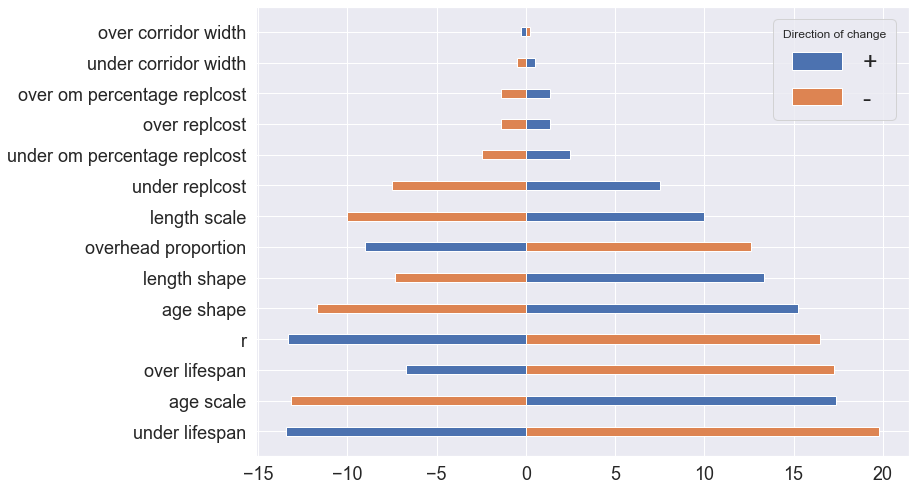

In [12]:
# openning the sensitivity analysis results for under strategy
with open(r'../../results/outcomes/cost-sensitivity-result-under.csv') as su:
    sensitivity_under=pd.read_csv(su)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# creating a dataframe
df = pd.DataFrame()
df['input'] = [sensitivity_under.iloc[7][0],sensitivity_under.iloc[13][0],sensitivity_under.iloc[6][0],sensitivity_under.iloc[0][0],sensitivity_under.iloc[12][0],sensitivity_under.iloc[10][0],sensitivity_under.iloc[5][0],sensitivity_under.iloc[11][0],sensitivity_under.iloc[4][0],sensitivity_under.iloc[9][0],sensitivity_under.iloc[3][0],sensitivity_under.iloc[8][0],sensitivity_under.iloc[2][0],sensitivity_under.iloc[1][0]]
df['+']=[sensitivity_under.iloc[7][1],sensitivity_under.iloc[13][1],sensitivity_under.iloc[6][1],sensitivity_under.iloc[0][1],sensitivity_under.iloc[12][1],sensitivity_under.iloc[10][1],sensitivity_under.iloc[5][1],sensitivity_under.iloc[11][1],sensitivity_under.iloc[4][1],sensitivity_under.iloc[9][1],sensitivity_under.iloc[3][1],sensitivity_under.iloc[8][1],sensitivity_under.iloc[2][1],sensitivity_under.iloc[1][1]]
df['-']=[sensitivity_under.iloc[7][2],sensitivity_under.iloc[13][2],sensitivity_under.iloc[6][2],sensitivity_under.iloc[0][2],sensitivity_under.iloc[12][2],sensitivity_under.iloc[10][2],sensitivity_under.iloc[5][2],sensitivity_under.iloc[11][2],sensitivity_under.iloc[4][2],sensitivity_under.iloc[9][2],sensitivity_under.iloc[3][2],sensitivity_under.iloc[8][2],sensitivity_under.iloc[2][2],sensitivity_under.iloc[1][2]]

#now stacking it
df2 = pd.melt(df, id_vars ='input', var_name='type of change', value_name='change in the output' )

fig, ax = plt.subplots()
for typ, df in zip(df2['type of change'].unique(),df2.groupby('type of change')):
    ax.barh(df[1]['input'], df[1]['change in the output'], height=0.3, label=typ)
ax.legend(title = 'Direction of change', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/cost-sensitivity-under.png', dpi=300, bbox_inches='tight')

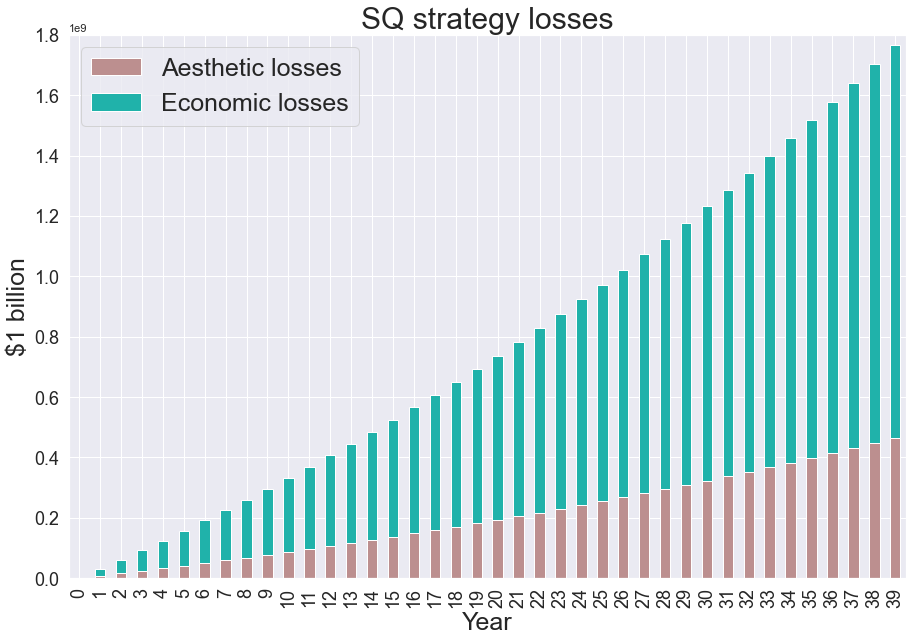

In [18]:
# plotting statusquo strategy losses
with open(r'../../results/outcomes/benefit-analyze-result-statusQuo-strategy.csv') as ra:
    additional_losses=pd.read_csv(ra)
new_additional_losses= additional_losses[['aesthetic losses', 'economic losses']].copy()
newer_additional_losses=np.cumsum(new_additional_losses)
newer_additional_losses.plot.bar(stacked=True,color=['rosybrown','lightseagreen'])
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.ylim([0, 1800000000])
plt.grid()
plt.title("SQ strategy losses", fontsize=30)
plt.ylabel('$1 billion', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.legend(['Aesthetic losses', 'Economic losses'], fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.figure(figsize=(3, 3))
#plt.legend('Lifecycle infrastructure', 'Environmental restoration', 'Safety & Health')
plt.savefig(r'../../figures/statusQuo-strategy-losses.png')

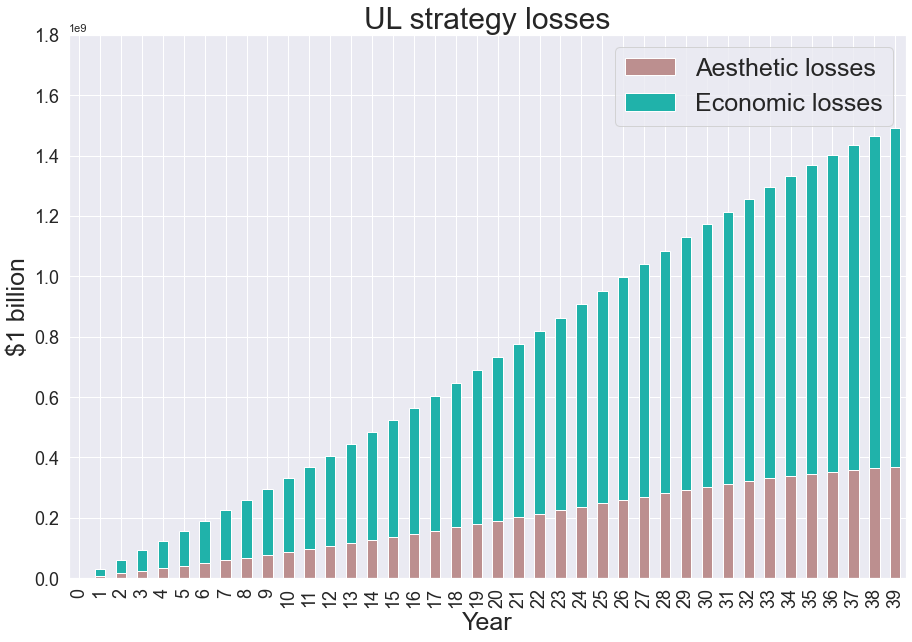

In [19]:
# plotting undergrounding after lifespan strategy losses
with open(r'../../results/outcomes/benefit-analyze-undergrounding-strategy.csv') as ra:
    additional_losses=pd.read_csv(ra)
new_additional_losses= additional_losses[['aesthetic losses', 'economic losses']].copy()
newer_additional_losses=np.cumsum(new_additional_losses)
newer_additional_losses.plot.bar(stacked=True,color=['rosybrown','lightseagreen'])
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.ylim([0, 1800000000])
plt.grid()
plt.title("UL strategy losses", fontsize=30)
plt.ylabel('$1 billion', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.legend(['Aesthetic losses', 'Economic losses'], fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/undergrounding-after-lifespan-strategy-losses.png')

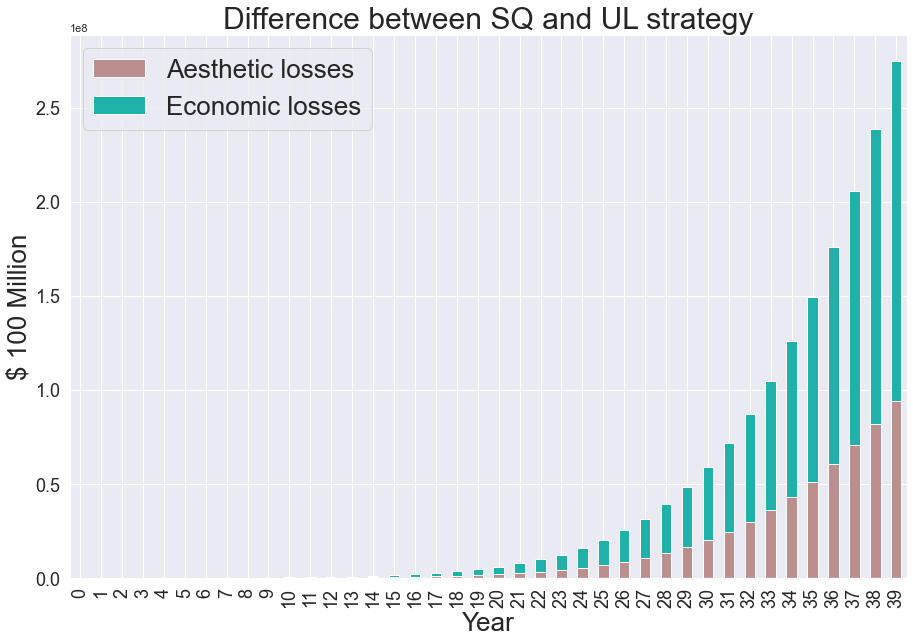

In [20]:
# plotting additional losses due to undergrounding
with open(r'../../results/outcomes/benefit-analyze-result-additional.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['aesthetic losses', 'economic losses']].copy()
#new_additional_cost=-1*new_additional_cost
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True,color=['rosybrown','lightseagreen'])
plt.title("Difference between SQ and UL strategy", fontsize=30)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-4000000000,0])
plt.grid()
plt.ylabel('$ 100 Million',fontsize=26)
plt.xlabel('Year',fontsize=26)
plt.legend(['Aesthetic losses', 'Economic losses'], fontsize=26)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/additional-losses-statusQuo.png')

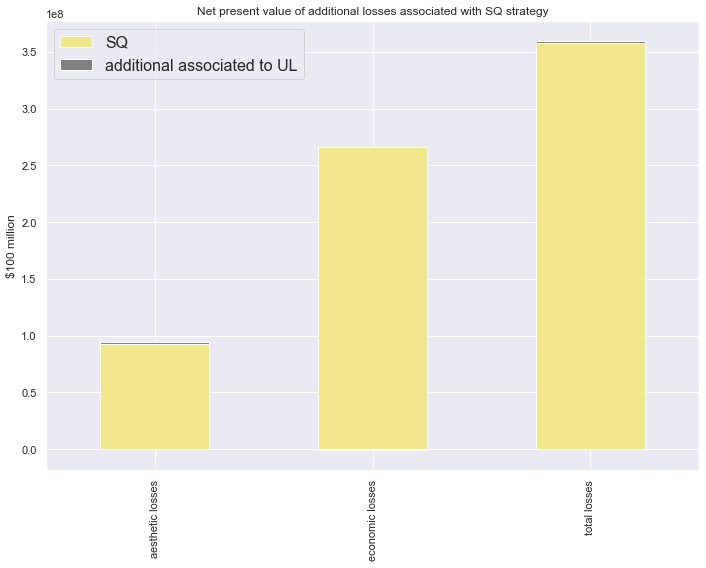

In [16]:
# plotting net present value of losses
with open(r'../../results/outcomes/benefit-net-present-value-under.csv') as ns:
    net_losses_statusQuo= pd.read_csv(ns)
with open(r'../../results/outcomes/benefit-net-present-value-additional.csv') as na:
    net_losses_additional= pd.read_csv(na) 
frames = [net_losses_statusQuo, net_losses_additional]
result = pd.concat(frames)
result['strategy']=['SQ','additional associated to UL']
result.set_index('strategy').T.plot.bar(stacked=True, color=['khaki','gray'])
plt.title("Net present value of additional losses associated with SQ strategy")
plt.ylabel('$100 million')
plt.legend(fontsize=16)
#plt.figure(figsize=(3, 3))
plt.savefig(r'../../figures/net-present-cost.png', dpi=100)

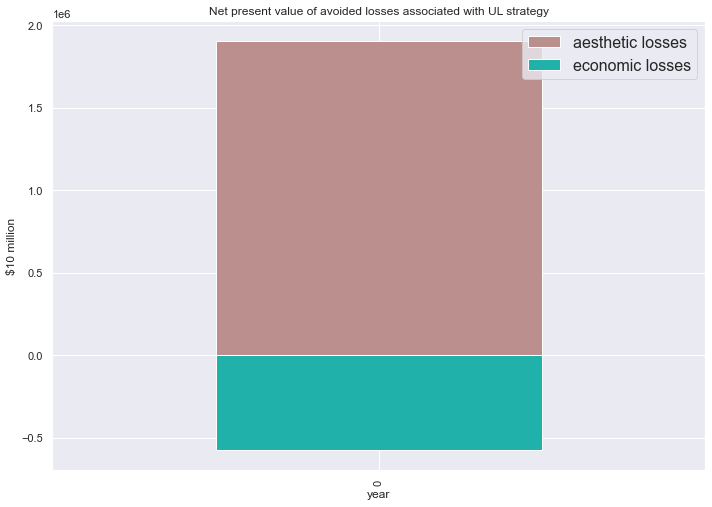

In [17]:
# plotting net present value of benefits(avoided losses)
with open(r'../../results/outcomes/benefit-net-present-value-additional.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['aesthetic losses', 'economic losses']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True, color=['rosybrown','lightseagreen'])
plt.title("Net present value of avoided losses associated with UL strategy")
plt.ylabel('$10 million')
plt.xlabel('year')
plt.legend(fontsize=16)
plt.savefig(r'../../figures/net-present-benefit.png.png')